In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-05-27.csv")
df = pd.read_csv("data/inc/data-inc-2024-06-03.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171336 entries, 0 to 171335
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        171336 non-null  int64  
 1   id_mls                    171336 non-null  object 
 2   bathrooms_total           171336 non-null  float64
 3   bedrooms_extra            171336 non-null  float64
 4   bedrooms                  171336 non-null  float64
 5   stories_total             171336 non-null  float64
 6   size_interior             171336 non-null  float64
 7   building_type             171336 non-null  object 
 8   agency_name               171336 non-null  object 
 9   agency_type               171336 non-null  object 
 10  property_type             171336 non-null  object 
 11  lng                       171336 non-null  float64
 12  lat                       171336 non-null  float64
 13  ownership_type            171336 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26977806,24012695,1,4 + 0,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.156950,Freehold,1,165.69X150.67,0,https://realtor.ca/real-estate/26977806/6682-6...,638530114609500000,N9V2Y9,Ontario,689900.0
1,26977784,40597646,2,3 + 1,1.00,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,Single Family,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,1,1 + 0,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
3,26976037,24012692,1,1 + 0,NaN,600.0000,none,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,none,none,0X,0,https://realtor.ca/real-estate/26976037/3355-s...,638528728483000000,N9C1B2,Ontario,229900.0
4,26975745,24012688,0,0,NaN,NaN,No Building,LC PLATINUM REALTY INC. - 525,Firm,Vacant Land,...,42.311078,Freehold,1,28.5 X 118.71,0,https://realtor.ca/real-estate/26975745/304-el...,638528620574070000,N9A5Z1,Ontario,149900.0


In [5]:
df.shape

(24486, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24486 entries, 0 to 24485
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24486 non-null  int64  
 1   id_mls                    24486 non-null  object 
 2   bathrooms_total           24486 non-null  int64  
 3   bedrooms                  24486 non-null  object 
 4   stories_total             16333 non-null  float64
 5   size_interior             12847 non-null  object 
 6   building_type             24486 non-null  object 
 7   agency_name               24486 non-null  object 
 8   agency_type               24486 non-null  object 
 9   property_type             24486 non-null  object 
 10  lng                       24486 non-null  float64
 11  lat                       24486 non-null  float64
 12  ownership_type            24486 non-null  object 
 13  ownership_type_group_ids  24486 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26977784,40597646,2,3 + 1,1.0,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,Single Family,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,1,1 + 0,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
3,26976037,24012692,1,1 + 0,NaN,600.0000,none,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,none,none,0X,0,https://realtor.ca/real-estate/26976037/3355-s...,638528728483000000,N9C1B2,Ontario,229900.0
9,26971789,24012667,5,5 + 0,2.0,3400.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.237829,Freehold,1,62.9X273.38,0,https://realtor.ca/real-estate/26971789/1119-r...,638527757028030000,N9J1B9,Ontario,1450000.0
10,26971171,40598166,2,6,2.0,1678.0000,Duplex,INTERNATIONAL REALTY FIRM INC BROKERAGE,Firm,Multi-family,...,42.308114,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26971171/1379-1...,638527727659770000,N8X4P2,Ontario,799900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24481,26946675,15654,2,2,NaN,1264 sqft,House,URBAN REALTY GROUP,Firm,Single Family,...,60.251172,none,none,1.38 ac,0,https://realtor.ca/real-estate/26946675/2-spir...,638524066837000000,Y0B1B0,Yukon,589000.0
24482,26972315,5829,1,3,NaN,1428 sqft,Mobile Home,RE/MAX North of 60,Firm,Single Family,...,62.438877,none,none,4434,0,https://realtor.ca/real-estate/26972315/835-du...,638527803513970000,X1A2Z4,Northwest Territories,459900.0
24483,26966378,5828,3,5,NaN,1894 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.454374,none,none,6050,0,https://realtor.ca/real-estate/26966378/166-je...,638526921418600000,NaN,Northwest Territories,675000.0
24484,26960713,5827,2,3,NaN,1253 sqft,Duplex,RE/MAX North of 60,Firm,Single Family,...,62.434665,none,none,2661,0,https://realtor.ca/real-estate/26960713/471a-h...,638526057365870000,X1A0C6,Northwest Territories,439900.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           3622
Ontario                    3321
Alberta                    2705
Quebec                     1577
Manitoba                    596
Saskatchewan                558
New Brunswick               335
Newfoundland & Labrador     110
Yukon                        19
Northwest Territories         4
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    11497
British Columbia            3860
Quebec                      3592
Alberta                     2864
Manitoba                     678
Saskatchewan                 646
Nova Scotia                  589
New Brunswick                435
Newfoundland & Labrador      156
Prince Edward Island         145
Yukon                         20
Northwest Territories          4
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,24486.0,24486.0,16333.0,24486.0,24486.0,24486.0,2.448600e+04,24486.0
mean,26962041.0,2.0,2.0,-90.0,47.0,3.0,6.385263e+17,887997.0
std,9120.0,1.0,3.0,19.0,3.0,4.0,1.479484e+12,1087023.0
min,26945932.0,0.0,1.0,-135.0,42.0,0.0,6.385234e+17,1.0
25%,26954191.0,1.0,1.0,-113.0,44.0,0.0,6.385251e+17,420000.0
50%,26962212.0,2.0,2.0,-80.0,45.0,1.0,6.385262e+17,659900.0
75%,26969882.0,3.0,2.0,-77.0,49.0,4.0,6.385276e+17,999000.0
max,26977933.0,15.0,147.0,-53.0,62.0,248.0,6.385301e+17,51990000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

24482

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

8


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2442,26959515,X8384366,2,2,NaN,NaN,Mobile Home,DAVENPORT REALTY,Affiliate,Single Family,...,43.938099,none,none,under 1/2 acre,0,https://realtor.ca/real-estate/26959515/33-gra...,638525949937470000,N0G2L0,Ontario,389900.0
2443,26959515,X8384366,2,2,NaN,NaN,Mobile Home,DAVENPORT REALTY,Affiliate,Single Family,...,43.938099,none,none,under 1/2 acre,0,https://realtor.ca/real-estate/26959515/33-gra...,638525949937470000,N0G2L0,Ontario,389900.0
7559,26960163,E8384394,3,4,3.0,NaN,Row / Townhouse,HOUSESIGMA INC.,Firm,Single Family,...,43.962417,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26960163/10-262...,638526008187330000,L1L0R6,Ontario,759800.0
7560,26960163,E8384394,3,4,3.0,NaN,Row / Townhouse,HOUSESIGMA INC.,Firm,Single Family,...,43.962417,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26960163/10-262...,638526008187330000,L1L0R6,Ontario,759800.0
4694,26965763,E8388732,3,3,3.0,NaN,Row / Townhouse,RIGHT AT HOME REALTY,Firm,Single Family,...,43.702526,Freehold,1,13.78 x 77.33 FT,2,https://realtor.ca/real-estate/26965763/34-bel...,638526874587670000,M1L0G1,Ontario,859000.0
4696,26965763,E8388732,3,3,3.0,NaN,Row / Townhouse,RIGHT AT HOME REALTY,Firm,Single Family,...,43.702526,Freehold,1,13.78 x 77.33 FT,2,https://realtor.ca/real-estate/26965763/34-bel...,638526874587670000,M1L0G1,Ontario,859000.0
4495,26966866,W8388930,2,2,NaN,NaN,Apartment,KELLER WILLIAMS CO-ELEVATION REALTY,Firm,Single Family,...,43.682477,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26966866/1104-2...,638526947570530000,M9A0C4,Ontario,779900.0
4496,26966866,W8388930,2,2,NaN,NaN,Apartment,KELLER WILLIAMS CO-ELEVATION REALTY,Firm,Single Family,...,43.682477,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26966866/1104-2...,638526947570530000,M9A0C4,Ontario,779900.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2443,26959515,X8384366,2,2,NaN,NaN,Mobile Home,DAVENPORT REALTY,Affiliate,Single Family,...,43.938099,none,none,under 1/2 acre,0,https://realtor.ca/real-estate/26959515/33-gra...,638525949937470000,N0G2L0,Ontario,389900.0
7560,26960163,E8384394,3,4,3.0,NaN,Row / Townhouse,HOUSESIGMA INC.,Firm,Single Family,...,43.962417,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26960163/10-262...,638526008187330000,L1L0R6,Ontario,759800.0
4696,26965763,E8388732,3,3,3.0,NaN,Row / Townhouse,RIGHT AT HOME REALTY,Firm,Single Family,...,43.702526,Freehold,1,13.78 x 77.33 FT,2,https://realtor.ca/real-estate/26965763/34-bel...,638526874587670000,M1L0G1,Ontario,859000.0
4496,26966866,W8388930,2,2,NaN,NaN,Apartment,KELLER WILLIAMS CO-ELEVATION REALTY,Firm,Single Family,...,43.682477,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26966866/1104-2...,638526947570530000,M9A0C4,Ontario,779900.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(24478, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24478 entries, 0 to 24485
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24478 non-null  int64  
 1   id_mls                    24478 non-null  object 
 2   bathrooms_total           24478 non-null  int64  
 3   bedrooms                  24478 non-null  object 
 4   stories_total             16329 non-null  float64
 5   size_interior             12847 non-null  object 
 6   building_type             24478 non-null  object 
 7   agency_name               24478 non-null  object 
 8   agency_type               24478 non-null  object 
 9   property_type             24478 non-null  object 
 10  lng                       24478 non-null  float64
 11  lat                       24478 non-null  float64
 12  ownership_type            24478 non-null  object 
 13  ownership_type_group_ids  24478 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  14053
none                       4015
Condominium/Strata         3796
Strata                     1712
Condominium                 492
Leasehold                   195
Freehold Condo               70
Undivided Co-ownership       37
Leasehold Condo/Strata       36
Leasehold/Leased Land        36
Unknown                      16
Shares in Co-operative        8
Other, See Remarks            6
Timeshare/Fractional          3
Life Lease                    2
Cooperative                   1
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                         14079
Apartment                      4183
Row / Townhouse                2430
none                           1958
Duplex                          656
Mobile Home                     213
Triplex                         161
No Building                     139
Multi-Family                    119
Manufactured Home               119
Unknown                         104
Other                           103
Fourplex                         83
Recreational                     80
Manufactured Home/Mobile         20
Modular                          17
Commercial Mix                    5
Parking                           4
Two Apartment House               4
Residential Commercial Mix        1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  58
none                      30
Strata                     8
Leasehold/Leased Land      3
Condominium/Strata         2
Shares in Co-operative     1
Freehold Condo             1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    22149
Vacant Land       1771
Multi-family       326
Agriculture        140
Recreational        87
Parking              4
Business             1
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

24211    https://realtor.ca/real-estate/26970897/65275-...
Name: page_url, dtype: object

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22149 entries, 0 to 24485
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22149 non-null  int64  
 1   id_mls                    22149 non-null  object 
 2   bathrooms_total           22149 non-null  int64  
 3   bedrooms                  22149 non-null  object 
 4   stories_total             15990 non-null  float64
 5   size_interior             12492 non-null  object 
 6   building_type             22149 non-null  object 
 7   agency_name               22149 non-null  object 
 8   agency_type               22149 non-null  object 
 9   property_type             22149 non-null  object 
 10  lng                       22149 non-null  float64
 11  lat                       22149 non-null  float64
 12  ownership_type            22149 non-null  object 
 13  ownership_type_group_ids  22149 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    10656
British Columbia            3563
Quebec                      3153
Alberta                     2672
Manitoba                     596
Saskatchewan                 554
Nova Scotia                  426
New Brunswick                321
Newfoundland & Labrador      100
Prince Edward Island          85
Yukon                         19
Northwest Territories          4
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       14062
Apartment                    4169
Row / Townhouse              2428
Duplex                        574
none                          300
Mobile Home                   213
Triplex                       129
Manufactured Home             116
Fourplex                       60
Recreational                   40
Manufactured Home/Mobile       20
Other                          17
Modular                        17
Two Apartment House             4
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12816
Condominium/Strata         3776
none                       2988
Strata                     1687
Condominium                 491
Leasehold                   193
Freehold Condo               70
Undivided Co-ownership       37
Leasehold Condo/Strata       35
Leasehold/Leased Land        28
Unknown                      10
Other, See Remarks            6
Shares in Co-operative        6
Timeshare/Fractional          3
Life Lease                    2
Cooperative                   1
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,26976037,24012692,1,1 + 0,NaN,600.0000,none,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,none,none,0X,0,https://realtor.ca/real-estate/26976037/3355-s...,638528728483000000,N9C1B2,Ontario,229900.0
103,26949999,24012291,1,2 + 0,NaN,NaN,Apartment,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.251960,none,none,0X,0,https://realtor.ca/real-estate/26949999/3795-s...,638524372703800000,N9G2N7,Ontario,299900.0
153,26973442,X8393382,4,6 + 6,1.0,NaN,Fourplex,PRIME REAL ESTATE BROKERAGE,Firm,Single Family,...,42.406795,none,none,103 x 90.78 FT,0,https://realtor.ca/real-estate/26973442/135-se...,638527881711000000,N7L3R9,Ontario,799900.0
240,26962601,X8386286,2,2,1.0,NaN,Mobile Home,EASY LIST REALTY,Firm,Single Family,...,42.977039,none,none,NaN,0,https://realtor.ca/real-estate/26962601/89-570...,638526224251730000,N7W1B7,Ontario,354000.0
276,26959326,X8382478,2,2 + 0,1.0,NaN,Other,"RE/MAX SARNIA REALTY INC., BROKERAGE",Firm,Single Family,...,42.971178,none,none,LEASED LAND|under 1/2 acre,4,https://realtor.ca/real-estate/26959326/490-56...,638525945041630000,N7W0A9,Ontario,469900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24481,26946675,15654,2,2,NaN,1264 sqft,House,URBAN REALTY GROUP,Firm,Single Family,...,60.251172,none,none,1.38 ac,0,https://realtor.ca/real-estate/26946675/2-spir...,638524066837000000,Y0B1B0,Yukon,589000.0
24482,26972315,5829,1,3,NaN,1428 sqft,Mobile Home,RE/MAX North of 60,Firm,Single Family,...,62.438877,none,none,4434,0,https://realtor.ca/real-estate/26972315/835-du...,638527803513970000,X1A2Z4,Northwest Territories,459900.0
24483,26966378,5828,3,5,NaN,1894 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.454374,none,none,6050,0,https://realtor.ca/real-estate/26966378/166-je...,638526921418600000,NaN,Northwest Territories,675000.0
24484,26960713,5827,2,3,NaN,1253 sqft,Duplex,RE/MAX North of 60,Firm,Single Family,...,62.434665,none,none,2661,0,https://realtor.ca/real-estate/26960713/471a-h...,638526057365870000,X1A0C6,Northwest Territories,439900.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

3        https://realtor.ca/real-estate/26976037/3355-s...
103      https://realtor.ca/real-estate/26949999/3795-s...
153      https://realtor.ca/real-estate/26973442/135-se...
240      https://realtor.ca/real-estate/26962601/89-570...
276      https://realtor.ca/real-estate/26959326/490-56...
                               ...                        
24481    https://realtor.ca/real-estate/26946675/2-spir...
24482    https://realtor.ca/real-estate/26972315/835-du...
24483    https://realtor.ca/real-estate/26966378/166-je...
24484    https://realtor.ca/real-estate/26960713/471a-h...
24485    https://realtor.ca/real-estate/26953786/9-butl...
Name: page_url, Length: 2988, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

1494     https://realtor.ca/real-estate/26969813/206-bi...
1518     https://realtor.ca/real-estate/26965330/195-pe...
1713     https://realtor.ca/real-estate/26957845/9826-n...
1857     https://realtor.ca/real-estate/26977526/5862-w...
1859     https://realtor.ca/real-estate/26977389/7-pepp...
2057     https://realtor.ca/real-estate/26970807/99-fou...
2285     https://realtor.ca/real-estate/26964160/310-al...
2686     https://realtor.ca/real-estate/26952528/lot-79...
2687     https://realtor.ca/real-estate/26952527/117-me...
2732     https://realtor.ca/real-estate/26950629/41-ced...
8319     https://realtor.ca/real-estate/26971673/4121-h...
8639     https://realtor.ca/real-estate/26964374/101-li...
8734     https://realtor.ca/real-estate/26960512/61-fif...
8848     https://realtor.ca/real-estate/26955777/46-lak...
9211     https://realtor.ca/real-estate/26970876/2152-c...
10719    https://realtor.ca/real-estate/26969428/346-mc...
22813    https://realtor.ca/real-estate/26957539/113-2n.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,
Alberta,459,225,3,1607,37,0,31,0,0,3,304,2,0,1
British Columbia,1051,131,2,1685,75,20,16,0,0,3,565,5,0,10
Manitoba,43,17,0,496,0,0,15,0,2,0,23,0,0,0
New Brunswick,3,0,0,294,0,0,10,0,0,0,7,0,0,7
Newfoundland & Labrador,0,0,0,93,0,0,3,0,0,0,0,0,4,0
Northwest Territories,0,1,0,0,0,0,2,0,0,0,1,0,0,0
Nova Scotia,13,5,0,342,0,0,18,0,0,34,12,0,0,2
Ontario,1790,44,9,7048,0,0,67,16,15,0,1412,14,0,241
Prince Edward Island,3,3,0,75,0,0,3,0,0,0,1,0,0,0


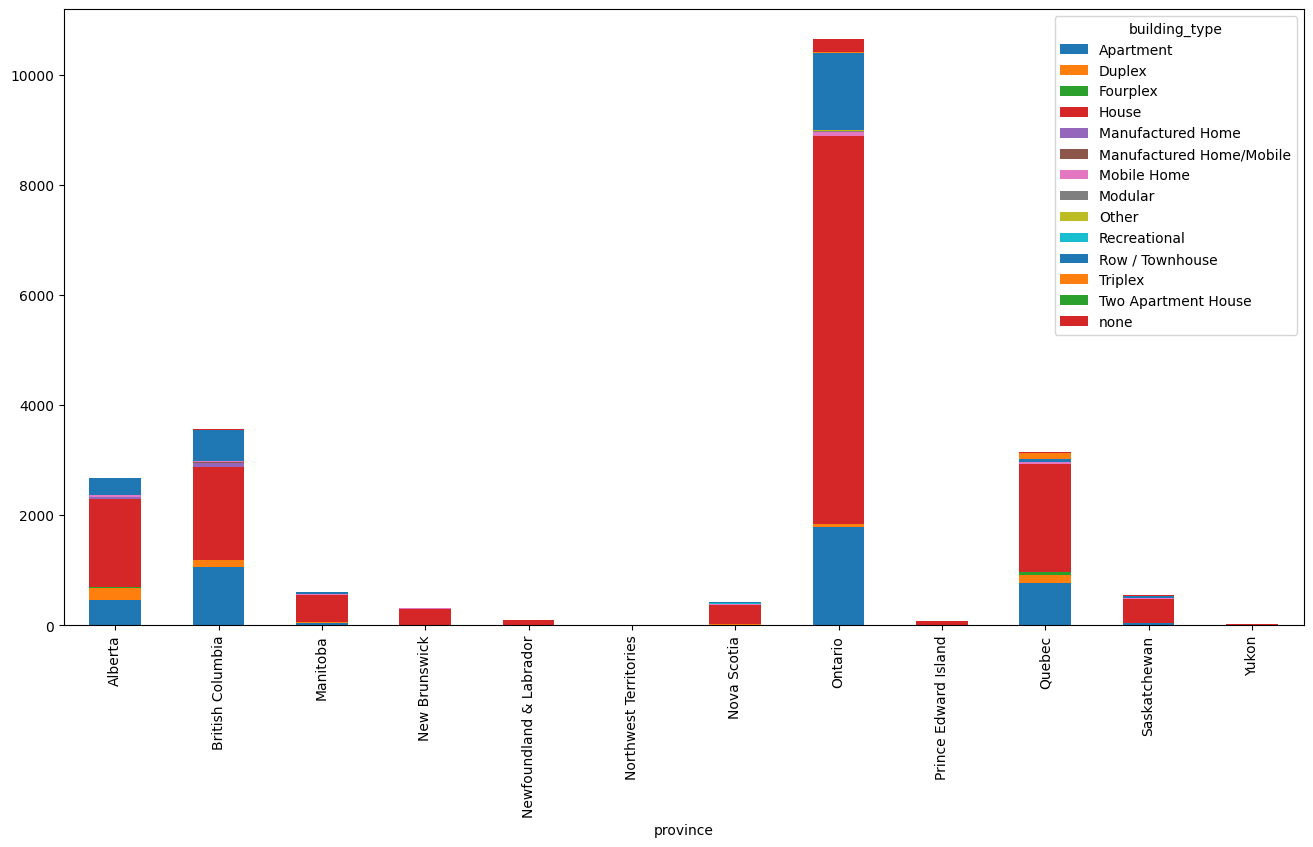

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

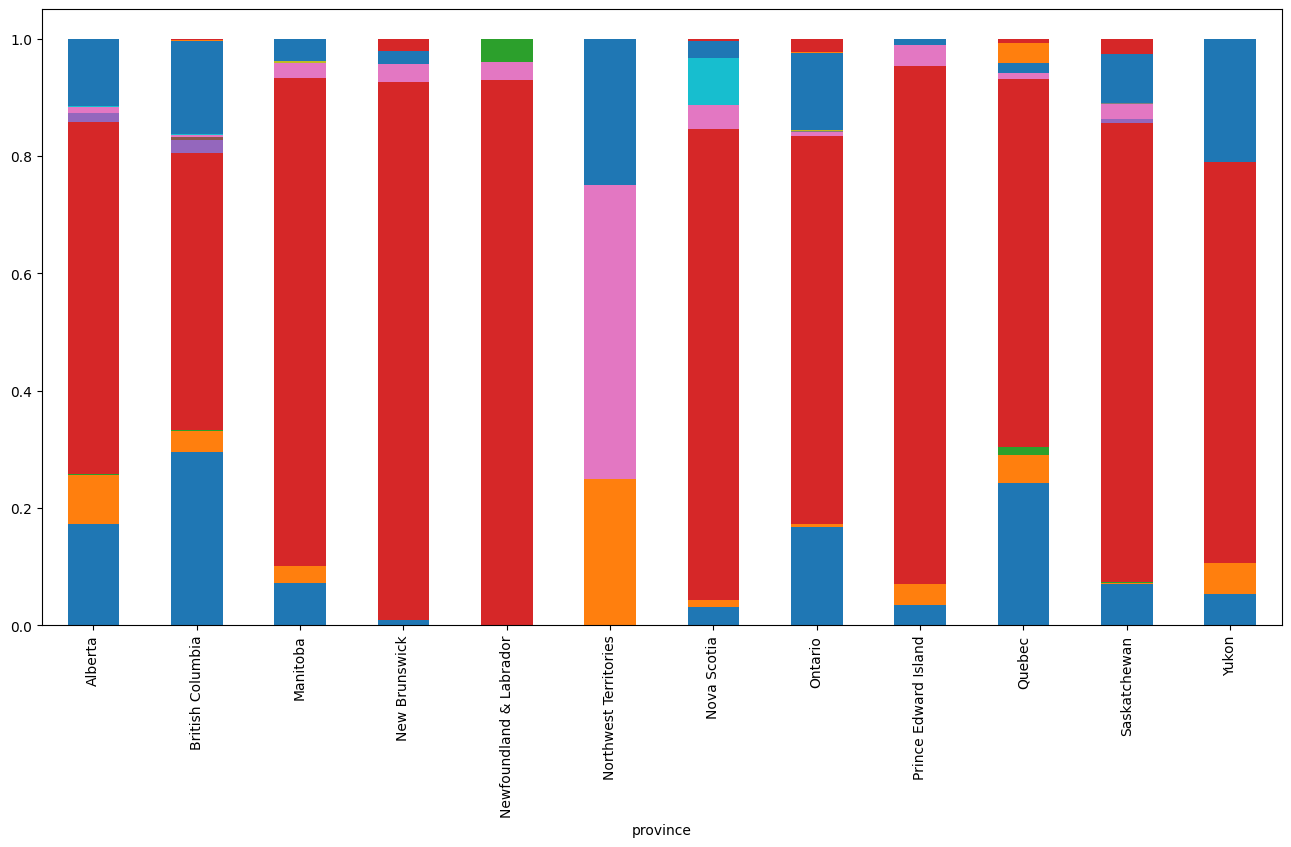

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,772,0,1767,0,13,0,0,0,0,0,0,0,0,0,120
British Columbia,0,44,0,1670,0,65,31,28,0,4,2,1687,2,0,8,22
Manitoba,0,1,0,511,70,13,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,11,0,216,0,10,0,0,0,0,0,0,0,0,0,84
Newfoundland & Labrador,0,0,0,93,0,3,0,0,0,0,0,0,0,0,0,4
Northwest Territories,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Nova Scotia,0,21,0,397,0,7,0,0,0,0,0,0,1,0,0,0
Ontario,491,2032,1,7620,0,76,4,0,2,2,4,0,0,0,0,424
Prince Edward Island,0,4,0,80,0,0,0,0,0,0,0,0,0,0,1,0


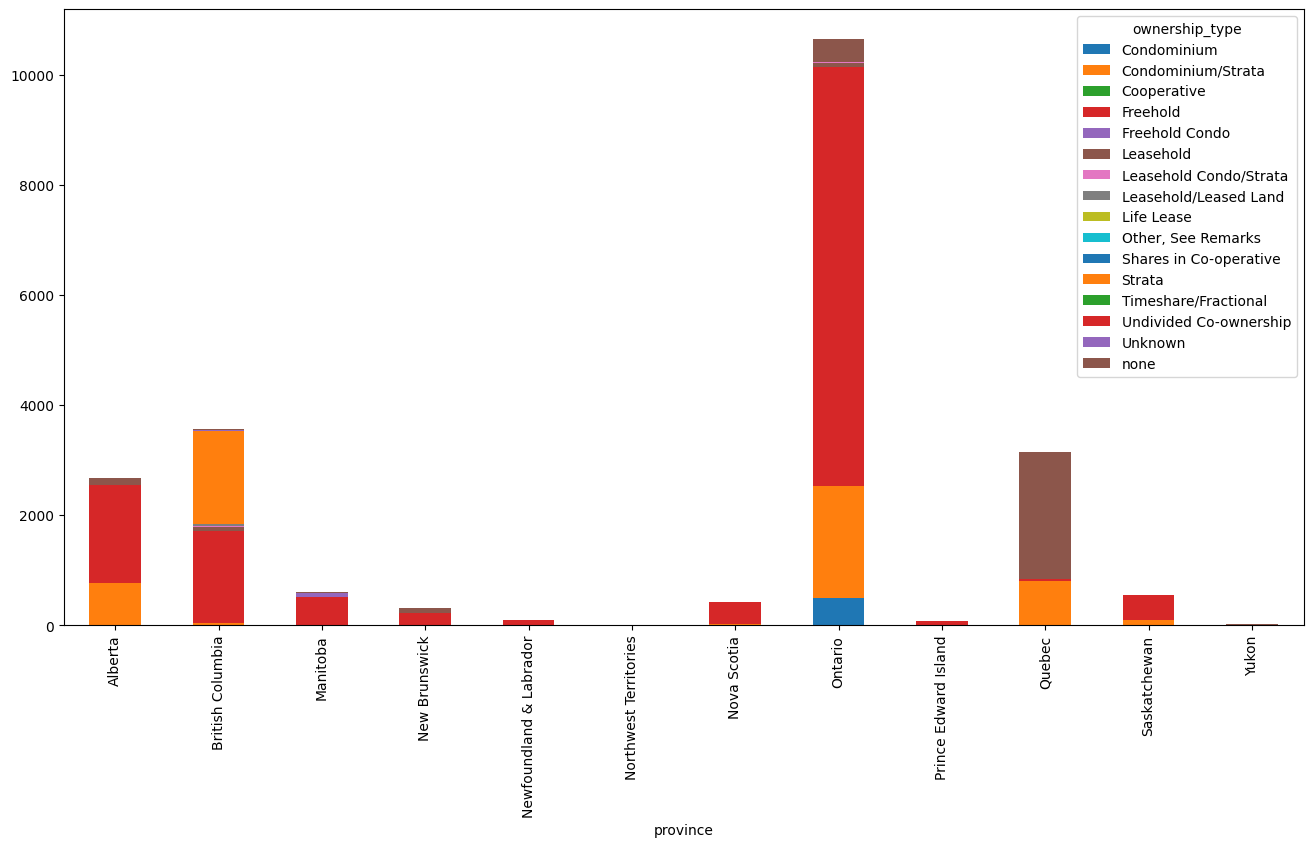

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

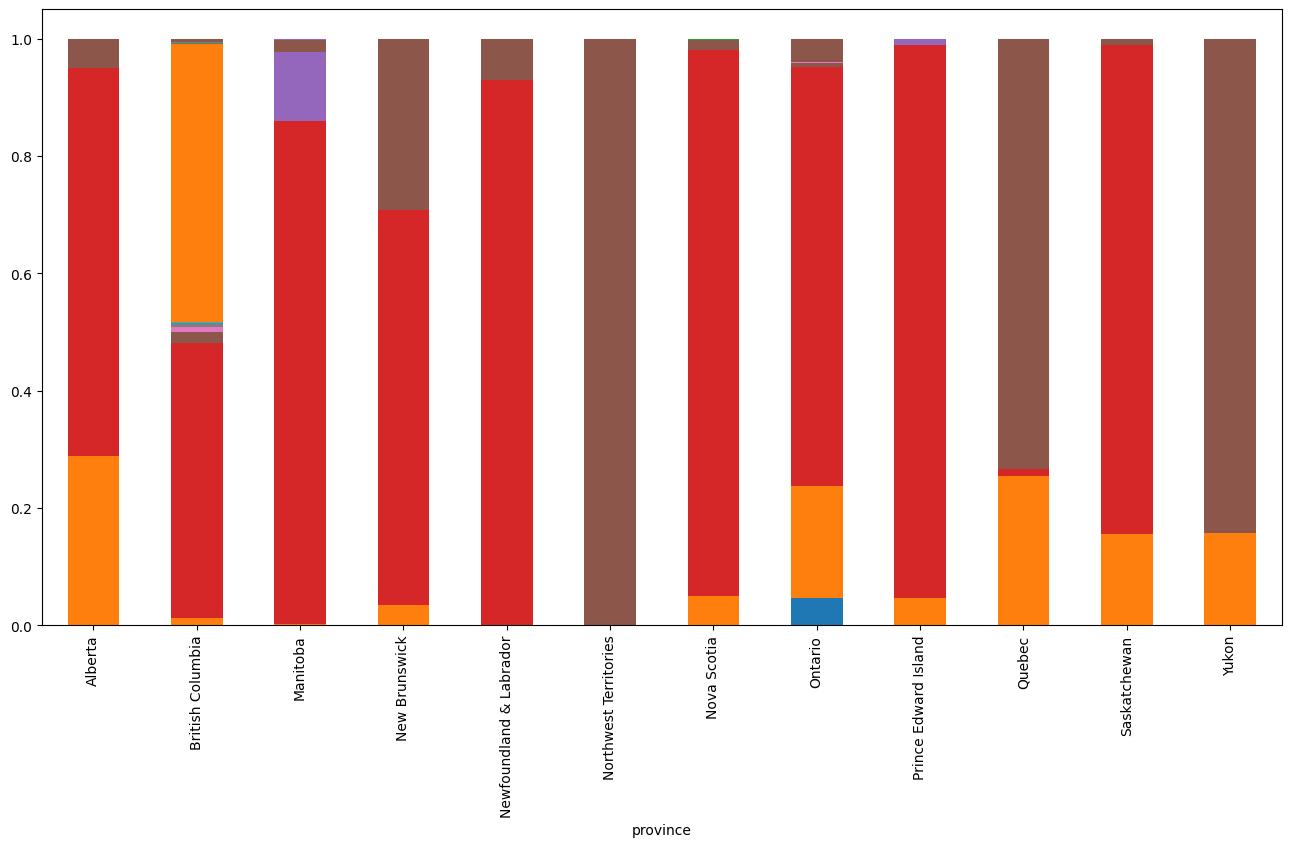

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2757
Strata                     974
Condominium                290
Freehold Condo              40
Undivided Co-ownership      35
Leasehold Condo/Strata      28
Freehold                    21
Shares in Co-operative       6
Leasehold                    6
Leasehold/Leased Land        4
Life Lease                   2
Timeshare/Fractional         2
Unknown                      2
none                         1
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                  252
none                      188
Strata                     81
Condominium/Strata         50
Leasehold                   2
Leasehold Condo/Strata      1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,
Condominium,290,0,0,12,0,0,0,0,0,0,187,0,0,2
Condominium/Strata,2757,50,0,83,11,0,0,0,2,2,843,1,0,27
Cooperative,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Freehold,21,252,5,11498,34,12,48,5,1,36,845,5,4,50
Freehold Condo,40,0,0,9,0,0,0,0,1,0,20,0,0,0
Leasehold,6,2,0,59,35,7,64,11,0,0,4,0,0,5
Leasehold Condo/Strata,28,1,0,0,1,0,0,0,0,0,4,0,0,1
Leasehold/Leased Land,4,0,0,13,9,0,0,0,0,0,2,0,0,0
Life Lease,2,0,0,0,0,0,0,0,0,0,0,0,0,0


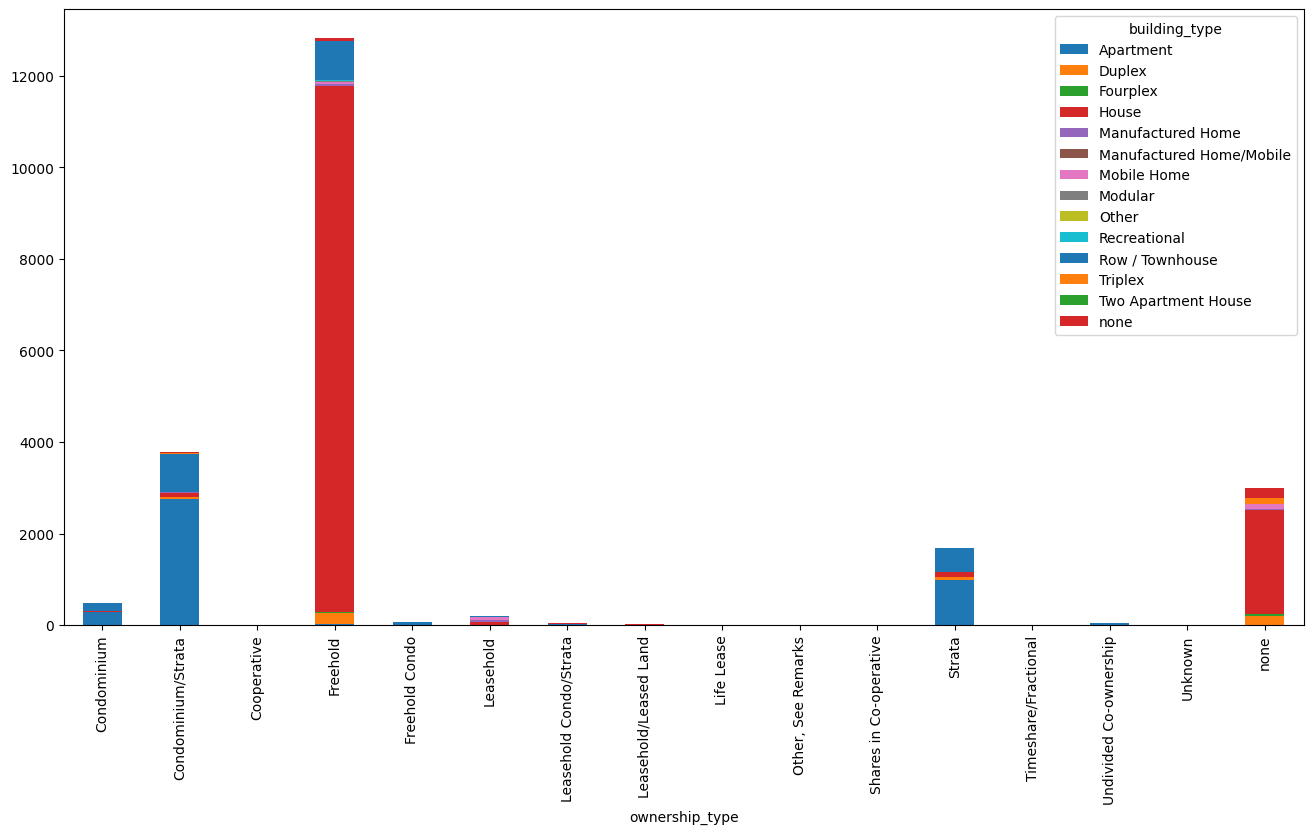

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

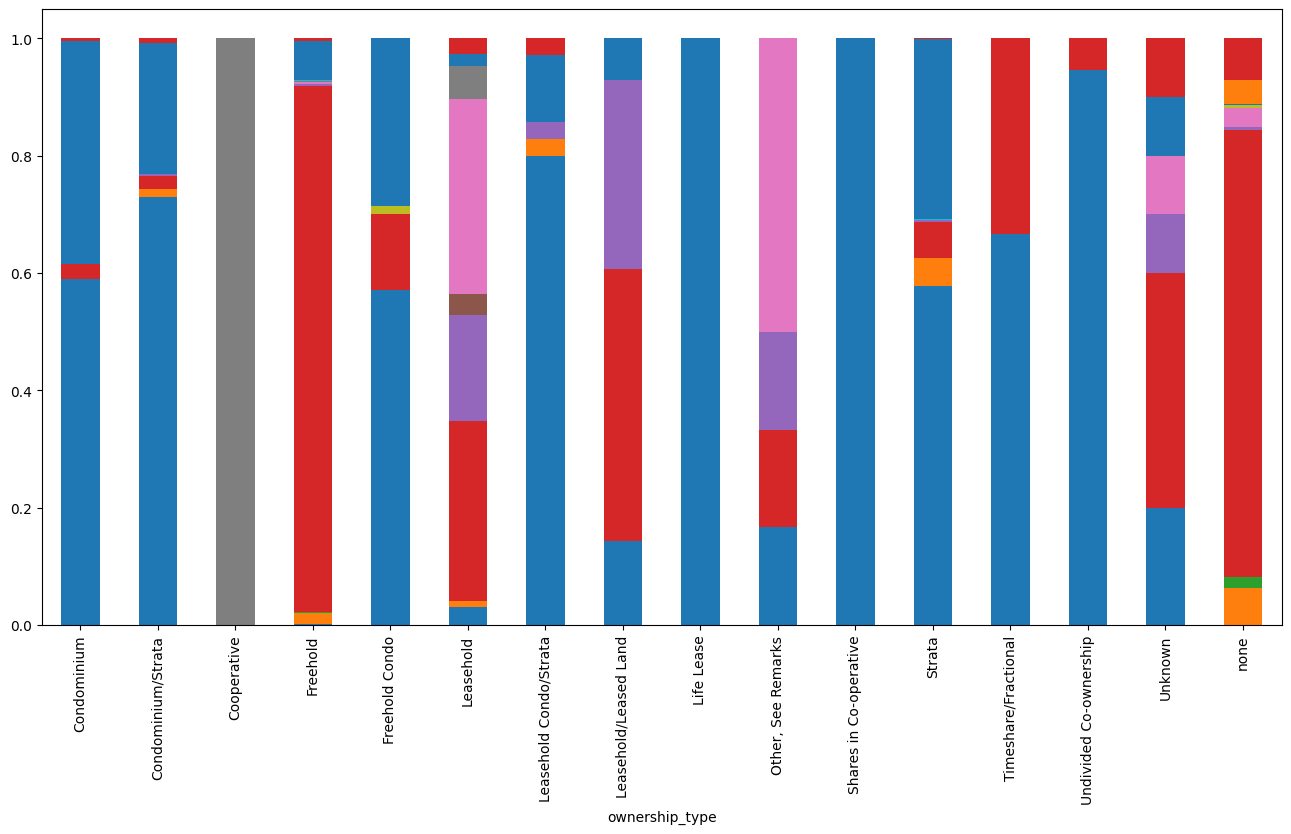

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,574.0,574.0,347.0,574.0,574.0,574.0,5.740000e+02,574.0
mean,26962950.0,3.0,2.0,-102.0,49.0,2.0,6.385264e+17,735016.0
std,8857.0,1.0,0.0,20.0,3.0,2.0,1.432367e+12,538205.0
min,26945938.0,1.0,1.0,-135.0,42.0,0.0,6.385234e+17,129900.0
25%,26955735.0,2.0,2.0,-114.0,46.0,0.0,6.385253e+17,400000.0
50%,26962985.0,3.0,2.0,-114.0,49.0,2.0,6.385263e+17,582500.0
75%,26970922.0,3.0,2.0,-74.0,51.0,4.0,6.385277e+17,846725.0
max,26977708.0,7.0,4.0,-63.0,62.0,35.0,6.385299e+17,5500000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,129.0,129.0,64.0,129.0,129.0,129.0,1.290000e+02,129.0
mean,26962209.0,2.0,2.0,-76.0,46.0,3.0,6.385263e+17,913640.0
std,9699.0,1.0,1.0,10.0,2.0,3.0,1.570018e+12,581020.0
min,26946368.0,1.0,1.0,-123.0,43.0,0.0,6.385236e+17,150000.0
25%,26953908.0,1.0,2.0,-74.0,45.0,0.0,6.385251e+17,550000.0
50%,26962733.0,1.0,2.0,-74.0,46.0,3.0,6.385262e+17,849900.0
75%,26971161.0,2.0,3.0,-73.0,46.0,4.0,6.385277e+17,1050000.0
max,26977655.0,11.0,3.0,-69.0,54.0,12.0,6.385298e+17,4500000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,60.0,60.0,31.0,60.0,60.0,60.0,6.000000e+01,60.0
mean,26961959.0,2.0,2.0,-78.0,46.0,3.0,6.385263e+17,864023.0
std,8737.0,2.0,1.0,12.0,2.0,4.0,1.436930e+12,455333.0
min,26945980.0,1.0,1.0,-120.0,42.0,0.0,6.385234e+17,219000.0
25%,26954808.0,1.0,2.0,-78.0,45.0,0.0,6.385252e+17,599000.0
50%,26962226.0,1.0,2.0,-74.0,46.0,3.0,6.385262e+17,787000.0
75%,26968236.0,2.0,2.0,-73.0,47.0,5.0,6.385271e+17,1046250.0
max,26977872.0,8.0,3.0,-71.0,54.0,12.0,6.385301e+17,2425000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2428.0,2428.0,1785.0,2428.0,2428.0,2428.0,2.428000e+03,2428.0
mean,26961892.0,3.0,2.0,-94.0,46.0,2.0,6.385263e+17,765633.0
std,8907.0,1.0,1.0,20.0,3.0,1.0,1.431497e+12,390927.0
min,26945933.0,0.0,1.0,-135.0,42.0,0.0,6.385234e+17,89000.0
25%,26954356.0,2.0,2.0,-114.0,44.0,1.0,6.385251e+17,524175.0
50%,26961932.0,3.0,2.0,-80.0,44.0,2.0,6.385262e+17,699999.0
75%,26969514.0,3.0,3.0,-79.0,49.0,2.0,6.385276e+17,919900.0
max,26977905.0,7.0,16.0,-63.0,62.0,8.0,6.385301e+17,8498000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       14062
Apartment                    4169
Row / Townhouse              2428
Semi-Detached                 763
none                          300
Mobile Home                   213
Manufactured Home             116
Recreational                   40
Manufactured Home/Mobile       20
Other                          17
Modular                        17
Two Apartment House             4
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              14062
Apartment           4169
Row / Townhouse     2428
Semi-Detached        763
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21422 entries, 0 to 24485
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21422 non-null  int64  
 1   id_mls                    21422 non-null  object 
 2   bathrooms_total           21422 non-null  int64  
 3   bedrooms                  21422 non-null  object 
 4   stories_total             15502 non-null  float64
 5   size_interior             11979 non-null  object 
 6   building_type             21422 non-null  object 
 7   agency_name               21422 non-null  object 
 8   agency_type               21422 non-null  object 
 9   property_type             21422 non-null  object 
 10  lng                       21422 non-null  float64
 11  lat                       21422 non-null  float64
 12  ownership_type            21422 non-null  object 
 13  ownership_type_group_ids  21422 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    10317
British Columbia            3439
Quebec                      3095
Alberta                     2600
Manitoba                     579
Saskatchewan                 520
Nova Scotia                  372
New Brunswick                304
Newfoundland & Labrador       93
Prince Edward Island          82
Yukon                         19
Northwest Territories          2
Name: count, dtype: int64

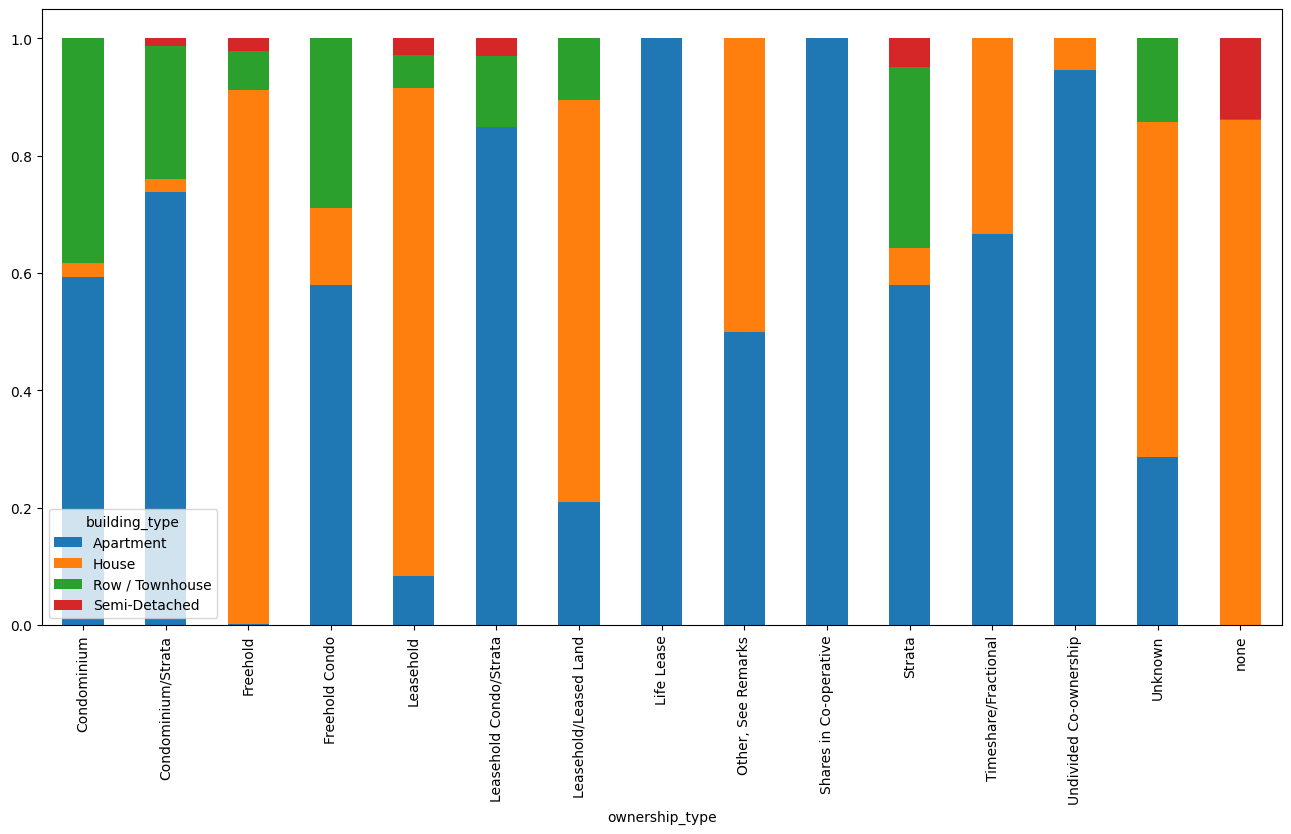

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12626
2           6009
none        2648
4             90
1 2           37
1 2 3 4        7
3              3
2 3            2
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11498
none        2277
2            208
4             72
1 2 3 4        4
1 2            2
3              1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4095
1 2          35
1            21
4            10
none          2
2 3           2
3             2
1 2 3 4       2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    364
1       262
2       135
4         2
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          1571
1           845
4             6
none          5
1 2 3 4       1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12626.0,12626.0,10339.0,12626.0,12626.0,12626.0,1.262600e+04,12626.0
mean,26962140.0,3.0,2.0,-90.0,46.0,3.0,6.385264e+17,1052666.0
std,9049.0,1.0,1.0,18.0,4.0,4.0,1.463209e+12,1046128.0
min,26945935.0,0.0,1.0,-130.0,42.0,0.0,6.385234e+17,1.0
25%,26954333.0,2.0,1.0,-113.0,44.0,0.0,6.385251e+17,549900.0
50%,26962555.0,3.0,2.0,-80.0,45.0,3.0,6.385262e+17,799900.0
75%,26969836.0,4.0,2.0,-79.0,50.0,5.0,6.385276e+17,1249888.0
max,26977918.0,15.0,5.0,-53.0,59.0,248.0,6.385301e+17,27800000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2648.0,2648.0,2387.0,2648.0,2648.0,2648.0,2.648000e+03,2648.0
mean,26962493.0,2.0,2.0,-75.0,46.0,4.0,6.385264e+17,696618.0
std,9503.0,1.0,1.0,10.0,2.0,4.0,1.565313e+12,614743.0
min,26945951.0,0.0,1.0,-135.0,42.0,0.0,6.385234e+17,29900.0
25%,26953873.0,1.0,1.0,-74.0,45.0,2.0,6.385251e+17,379900.0
50%,26962894.0,2.0,2.0,-74.0,46.0,4.0,6.385263e+17,549950.0
75%,26971151.0,2.0,2.0,-73.0,46.0,6.0,6.385277e+17,795000.0
max,26977887.0,8.0,3.0,-53.0,62.0,35.0,6.385301e+17,7900000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3.0,3.0,1.0,3.0,3.0,3.0,3.000000e+00,3.0
mean,26966397.0,2.0,2.0,-104.0,48.0,0.0,6.385271e+17,223300.0
std,12894.0,1.0,NaN,35.0,3.0,1.0,2.247049e+12,174973.0
min,26951935.0,1.0,2.0,-125.0,45.0,0.0,6.385247e+17,50000.0
25%,26961249.0,1.0,2.0,-124.0,47.0,0.0,6.385262e+17,135000.0
50%,26970563.0,1.0,2.0,-124.0,48.0,0.0,6.385277e+17,220000.0
75%,26973628.0,2.0,2.0,-94.0,49.0,0.0,6.385284e+17,309950.0
max,26976694.0,3.0,2.0,-63.0,50.0,1.0,6.385291e+17,399900.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,90.0,90.0,66.0,90.0,90.0,90.0,9.000000e+01,90.0
mean,26960579.0,2.0,1.0,-98.0,47.0,1.0,6.385261e+17,506214.0
std,8602.0,1.0,0.0,20.0,3.0,2.0,1.350099e+12,330000.0
min,26946333.0,0.0,1.0,-123.0,42.0,0.0,6.385236e+17,59900.0
25%,26954719.0,1.0,1.0,-120.0,44.0,0.0,6.385252e+17,286000.0
50%,26958792.0,2.0,1.0,-95.0,49.0,0.0,6.385259e+17,452450.0
75%,26969000.0,2.0,1.0,-81.0,50.0,2.0,6.385274e+17,643475.0
max,26977229.0,5.0,3.0,-54.0,56.0,10.0,6.385296e+17,2198000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,3.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,26961542.0,2.0,3.0,-119.0,49.0,1.0,6.385263e+17,867257.0
std,9497.0,1.0,2.0,9.0,0.0,1.0,1.724103e+12,403105.0
min,26950432.0,2.0,1.0,-123.0,49.0,0.0,6.385244e+17,379000.0
25%,26954200.0,2.0,2.0,-123.0,49.0,0.0,6.385251e+17,588950.0
50%,26961306.0,2.0,3.0,-122.0,49.0,1.0,6.385261e+17,669900.0
75%,26966713.0,3.0,4.0,-120.0,50.0,2.0,6.385270e+17,1222500.0
max,26977226.0,3.0,4.0,-100.0,50.0,2.0,6.385296e+17,1399000.0


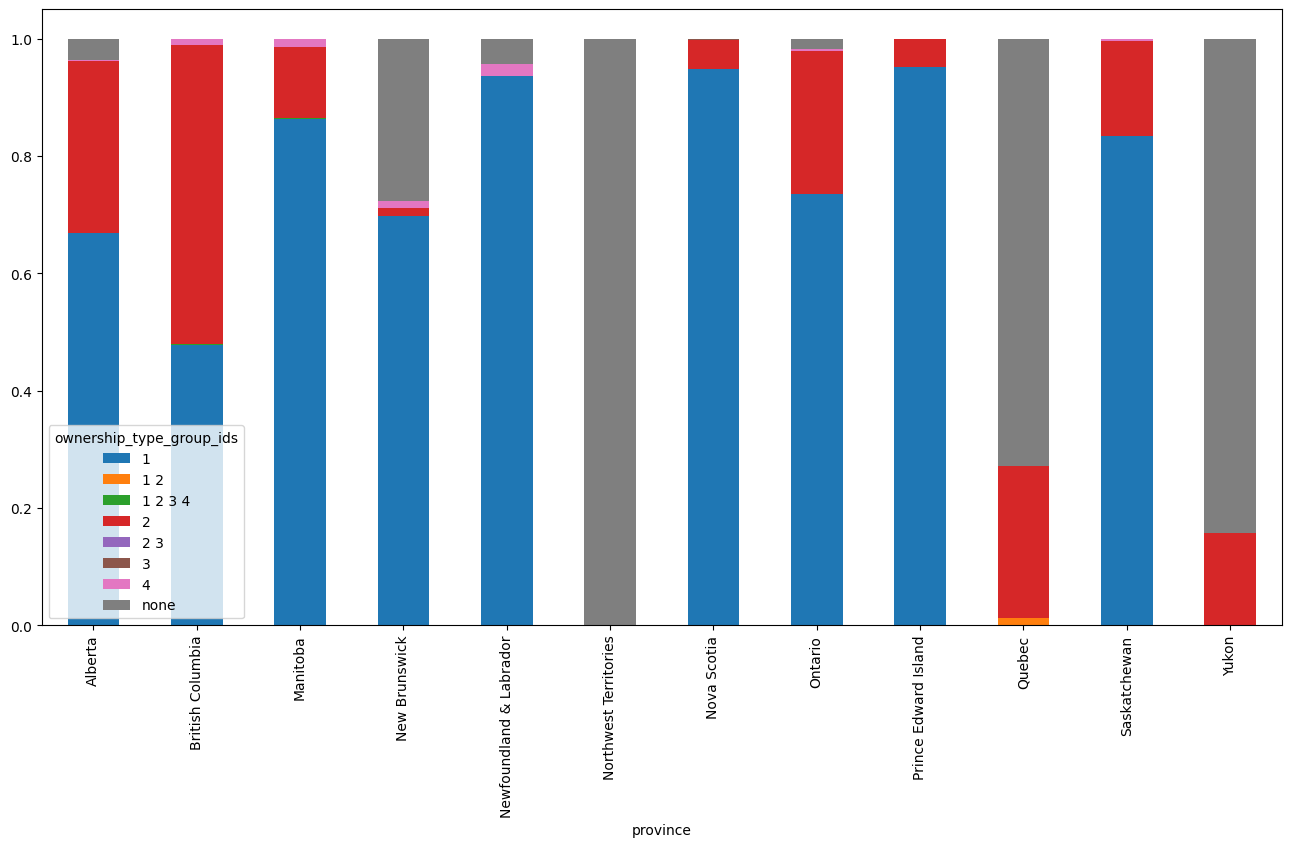

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12626
2           6009
none        2648
4             90
1 2           37
1 2 3 4        7
3              3
2 3            2
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_6886/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    12626
2     6009
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 24473
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18635 non-null  int64  
 1   id_mls                    18635 non-null  object 
 2   bathrooms_total           18635 non-null  int64  
 3   bedrooms                  18635 non-null  object 
 4   stories_total             13012 non-null  float64
 5   size_interior             10898 non-null  object 
 6   building_type             18635 non-null  object 
 7   agency_name               18635 non-null  object 
 8   agency_type               18635 non-null  object 
 9   property_type             18635 non-null  object 
 10  lng                       18635 non-null  float64
 11  lat                       18635 non-null  float64
 12  ownership_type            18635 non-null  object 
 13  ownership_type_group_ids  18635 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    10092
British Columbia            3394
Alberta                     2500
Quebec                       802
Manitoba                     570
Saskatchewan                 518
Nova Scotia                  371
New Brunswick                216
Newfoundland & Labrador       87
Prince Edward Island          82
Yukon                          3
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6886/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    9985
True     8650
Name: count, dtype: int64

In [73]:
df.shape

(18635, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6886/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26977806,24012695,1,4 + 0,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.156950,Freehold,1,165.69X150.67,0,https://realtor.ca/real-estate/26977806/6682-6...,638530114609500000,N9V2Y9,Ontario,689900.0
1,26977784,40597646,2,3 + 1,1.00,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,Single Family,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,1,1 + 0,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,Single Family,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
6,26972607,X8392538,2,3 + 1,2.00,NaN,House,RISING SUN REAL ESTATE INC.,Firm,Single Family,...,42.302580,Freehold,1,45.17 x 55.21 FT,0,https://realtor.ca/real-estate/26972607/1102-w...,638527811507970000,N9A5J9,Ontario,430000.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6886/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    3940
1    3188
2    1279
3     216
4      24
5       3
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

18635

In [80]:
bedrooms_extra[:20]

['0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '2',
 '0',
 '3',
 '2',
 '0',
 '0',
 '0']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26977806,24012695,0,1,4 + 0,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.156950,Freehold,1,165.69X150.67,0,https://realtor.ca/real-estate/26977806/6682-6...,638530114609500000,N9V2Y9,Ontario,689900.0
1,26977784,40597646,1,2,3 + 1,1.00,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,0,1,1 + 0,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,0,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
6,26972607,X8392538,1,2,3 + 1,2.00,NaN,House,RISING SUN REAL ESTATE INC.,Firm,...,42.302580,Freehold,1,45.17 x 55.21 FT,0,https://realtor.ca/real-estate/26972607/1102-w...,638527811507970000,N9A5J9,Ontario,430000.0
7,26972100,24012674,0,2,2 + 0,NaN,NaN,Row / Townhouse,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.320685,Freehold,1,23.42X145.44,0,https://realtor.ca/real-estate/26972100/883-mo...,638527792728200000,N8Y3L5,Ontario,389900.0
8,26972098,24012677,2,2,3 + 2,2.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.310095,Freehold,1,25X102.20 FT,0,https://realtor.ca/real-estate/26972098/339-br...,638527792724770000,N9B2M3,Ontario,349900.0
9,26971789,24012667,0,5,5 + 0,2.00,3400.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.237829,Freehold,1,62.9X273.38,0,https://realtor.ca/real-estate/26971789/1119-r...,638527757028030000,N9J1B9,Ontario,1450000.0
11,26970646,24012647,0,2,2 + 0,NaN,1180.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2 + 0,NaN,900.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6886/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18635 non-null  int64  
 1   id_mls                    18635 non-null  object 
 2   bedrooms_extra            18635 non-null  object 
 3   bathrooms_total           18635 non-null  int64  
 4   bedrooms                  18635 non-null  object 
 5   stories_total             13012 non-null  float64
 6   size_interior             10898 non-null  object 
 7   building_type             18635 non-null  object 
 8   agency_name               18635 non-null  object 
 9   agency_type               18635 non-null  object 
 10  property_type             18635 non-null  object 
 11  lng                       18635 non-null  float64
 12  lat                       18635 non-null  float64
 13  ownership_type            18635 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6886/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26977806,24012695,0,1,4,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.156950,Freehold,1,165.69X150.67,0,https://realtor.ca/real-estate/26977806/6682-6...,638530114609500000,N9V2Y9,Ontario,689900.0
1,26977784,40597646,1,2,3,1.00,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,0,1,1,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
6,26972607,X8392538,1,2,3,2.00,NaN,House,RISING SUN REAL ESTATE INC.,Firm,...,42.302580,Freehold,1,45.17 x 55.21 FT,0,https://realtor.ca/real-estate/26972607/1102-w...,638527811507970000,N9A5J9,Ontario,430000.0
7,26972100,24012674,0,2,2,NaN,NaN,Row / Townhouse,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.320685,Freehold,1,23.42X145.44,0,https://realtor.ca/real-estate/26972100/883-mo...,638527792728200000,N8Y3L5,Ontario,389900.0
8,26972098,24012677,2,2,3,2.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.310095,Freehold,1,25X102.20 FT,0,https://realtor.ca/real-estate/26972098/339-br...,638527792724770000,N9B2M3,Ontario,349900.0
9,26971789,24012667,0,5,5,2.00,3400.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.237829,Freehold,1,62.9X273.38,0,https://realtor.ca/real-estate/26971789/1119-r...,638527757028030000,N9J1B9,Ontario,1450000.0
11,26970646,24012647,0,2,2,NaN,1180.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2,NaN,900.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18635 non-null  int64  
 1   id_mls                    18635 non-null  object 
 2   bedrooms_extra            18635 non-null  int64  
 3   bathrooms_total           18635 non-null  int64  
 4   bedrooms                  18635 non-null  int64  
 5   stories_total             13012 non-null  float64
 6   size_interior             10898 non-null  object 
 7   building_type             18635 non-null  object 
 8   agency_name               18635 non-null  object 
 9   agency_type               18635 non-null  object 
 10  property_type             18635 non-null  object 
 11  lng                       18635 non-null  float64
 12  lat                       18635 non-null  float64
 13  ownership_type            18635 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    10092
British Columbia            3394
Alberta                     2500
Quebec                       802
Manitoba                     570
Saskatchewan                 518
Nova Scotia                  371
New Brunswick                216
Newfoundland & Labrador       87
Prince Edward Island          82
Yukon                          3
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18635 non-null  int64  
 1   id_mls                    18635 non-null  object 
 2   bedrooms_extra            18635 non-null  int64  
 3   bathrooms_total           18635 non-null  int64  
 4   bedrooms                  18635 non-null  int64  
 5   stories_total             13012 non-null  float64
 6   size_interior             10898 non-null  object 
 7   building_type             18635 non-null  object 
 8   agency_name               18635 non-null  object 
 9   agency_type               18635 non-null  object 
 10  property_type             18635 non-null  object 
 11  lng                       18635 non-null  float64
 12  lat                       18635 non-null  float64
 13  ownership_type            18635 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26977806,24012695,0,1,4,1.75,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.156950,Freehold,1,165.69X150.67,0,https://realtor.ca/real-estate/26977806/6682-6...,638530114609500000,N9V2Y9,Ontario,689900.0
1,26977784,40597646,1,2,3,1.00,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,0,1,1,NaN,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
6,26972607,X8392538,1,2,3,2.00,NaN,House,RISING SUN REAL ESTATE INC.,Firm,...,42.302580,Freehold,1,45.17 x 55.21 FT,0,https://realtor.ca/real-estate/26972607/1102-w...,638527811507970000,N9A5J9,Ontario,430000.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      4610
1.50       556
1.75        26
2.00      6028
2.50       163
3.00       935
3.50         3
4.00       265
5.00        37
6.00        90
7.00        24
8.00        39
9.00        11
10.00       11
11.00        6
12.00       17
13.00        2
14.00       12
15.00       12
16.00       15
17.00        8
18.00        5
19.00        7
20.00        6
21.00       11
22.00        2
23.00       19
24.00        5
25.00       12
26.00        5
27.00        2
28.00        4
29.00        5
30.00        5
31.00        6
32.00        4
33.00        3
34.00        4
36.00        5
37.00        1
38.00        4
40.00        4
41.00        4
43.00        5
44.00        4
46.00        1
47.00        1
50.00        2
51.00        3
57.00        1
61.00        1
147.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4610
1.50      556
1.75       26
2.00     6028
2.50      163
3.00      935
3.50        3
4.00      265
5.00       37
6.00       90
7.00       24
8.00       39
9.00       11
10.00      11
11.00       6
12.00      17
13.00       2
14.00      12
15.00      12
16.00      15
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2589
House              2258
Row / Townhouse     638
Semi-Detached       138
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

2        https://realtor.ca/real-estate/26976036/3355-s...
5        https://realtor.ca/real-estate/26972808/1547-g...
7        https://realtor.ca/real-estate/26972100/883-mo...
11       https://realtor.ca/real-estate/26970646/4578-h...
12       https://realtor.ca/real-estate/26970643/1900-6...
                               ...                        
24441    https://realtor.ca/real-estate/26957206/100-br...
24452    https://realtor.ca/real-estate/26948831/113-fa...
24467    https://realtor.ca/real-estate/26965375/11-65-...
24469    https://realtor.ca/real-estate/26962387/102-36...
24473    https://realtor.ca/real-estate/26956840/18-30-...
Name: page_url, Length: 5623, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18635 non-null  int64  
 1   id_mls                    18635 non-null  object 
 2   bedrooms_extra            18635 non-null  int64  
 3   bathrooms_total           18635 non-null  int64  
 4   bedrooms                  18635 non-null  int64  
 5   stories_total             18635 non-null  float64
 6   size_interior             10898 non-null  object 
 7   building_type             18635 non-null  object 
 8   agency_name               18635 non-null  object 
 9   agency_type               18635 non-null  object 
 10  property_type             18635 non-null  object 
 11  lng                       18635 non-null  float64
 12  lat                       18635 non-null  float64
 13  ownership_type            18635 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     10233
2.00      6028
3.00       935
1.50       556
4.00       265
2.50       163
6.00        90
8.00        39
5.00        37
1.75        26
7.00        24
23.00       19
12.00       17
16.00       15
14.00       12
15.00       12
25.00       12
10.00       11
21.00       11
9.00        11
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

192      https://realtor.ca/real-estate/26967847/620-cr...
477      https://realtor.ca/real-estate/26975826/2610-k...
480      https://realtor.ca/real-estate/26975039/2835-s...
762      https://realtor.ca/real-estate/26959145/118-19...
1002     https://realtor.ca/real-estate/26951768/931-ge...
                               ...                        
24367    https://realtor.ca/real-estate/26946522/109-20...
24428    https://realtor.ca/real-estate/26968526/209-23...
24432    https://realtor.ca/real-estate/26964481/309-80...
24439    https://realtor.ca/real-estate/26959494/9-400-...
24449    https://realtor.ca/real-estate/26952736/206-82...
Name: page_url, Length: 935, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec              578
Alberta             283
British Columbia    129
Ontario              81
Saskatchewan          3
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

574      https://realtor.ca/real-estate/26967187/137-we...
783      https://realtor.ca/real-estate/26959081/121-20...
917      https://realtor.ca/real-estate/26957467/114-20...
1145     https://realtor.ca/real-estate/26964283/360-qu...
1514     https://realtor.ca/real-estate/26965986/1403-2...
                               ...                        
24428    https://realtor.ca/real-estate/26968526/209-23...
24429    https://realtor.ca/real-estate/26967882/307-24...
24432    https://realtor.ca/real-estate/26964481/309-80...
24448    https://realtor.ca/real-estate/26953531/245-20...
24449    https://realtor.ca/real-estate/26952736/206-82...
Name: page_url, Length: 1074, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
5        False
6        False
         ...  
24457    False
24461    False
24467    False
24469    False
24473    False
Length: 18635, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
5        True
6        True
         ... 
24457    True
24461    True
24467    True
24469    True
24473    True
Length: 18635, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 574 to 24449
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1074 non-null   int64  
 1   id_mls                    1074 non-null   object 
 2   bedrooms_extra            1074 non-null   int64  
 3   bathrooms_total           1074 non-null   int64  
 4   bedrooms                  1074 non-null   int64  
 5   stories_total             1074 non-null   float64
 6   size_interior             1010 non-null   object 
 7   building_type             1074 non-null   object 
 8   agency_name               1074 non-null   object 
 9   agency_type               1074 non-null   object 
 10  property_type             1074 non-null   object 
 11  lng                       1074 non-null   float64
 12  lat                       1074 non-null   float64
 13  ownership_type            1074 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     10233
2.00      5892
3.00       677
1.50       556
2.50       163
1.75        26
4.00         8
3.50         3
16.00        2
5.00         1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([ 1.75,  1.  ,  2.  ,  1.5 ,  2.5 ,  3.  ,  4.  , 16.  ,  3.5 ,
        5.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    10011
British Columbia            3265
Alberta                     2217
Manitoba                     570
Saskatchewan                 515
Nova Scotia                  371
Quebec                       224
New Brunswick                216
Newfoundland & Labrador       87
Prince Edward Island          82
Yukon                          3
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   object 
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1200 sqft       23
1500.0000       22
1100.0000       21
1200.0000       19
1040 sqft       18
                ..
3072 sqft        1
2318 sqft        1
2648 sqft        1
2952 sqft        1
1606.93 sqft     1
Name: count, Length: 5866, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26977784,40597646,1,2,3,1.0,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,0,1,1,1.0,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
9,26971789,24012667,0,5,5,2.0,3400.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.237829,Freehold,1,62.9X273.38,0,https://realtor.ca/real-estate/26971789/1119-r...,638527757028030000,N9J1B9,Ontario,1450000.0
11,26970646,24012647,0,2,2,1.0,1180.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2,1.0,900.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24457,26967264,A2136034,0,1,2,1.0,1440 sqft,House,RE/MAX Grande Prairie,Firm,...,58.747867,Freehold,1,1 ac|1 - 1.99 acres,10,https://realtor.ca/real-estate/26967264/2728-t...,638526983558900000,T0H1Z0,Alberta,279000.0
24461,26969328,A2137007,0,1,1,1.0,590 sqft,House,RE/MAX Grande Prairie,Firm,...,58.199852,Freehold,1,3.11 ac|2 - 4.99 acres,10,https://realtor.ca/real-estate/26969328/214-gr...,638527544334370000,T0H2H0,Alberta,365000.0
24467,26965375,15669,0,3,3,1.0,1946 sqft,Row / Townhouse,RE/MAX ACTION REALTY,Firm,...,60.776540,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26965375/11-65-...,638526857097200000,Y1A0P9,Yukon,550000.0
24469,26962387,15666,0,3,2,1.0,1572 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.731430,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26962387/102-36...,638526214820900000,Y1A6V1,Yukon,950000.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26977784,40597646,1,2,3,1.0,1600.0000,House,"STREETCITY REALTY INC., BROKERAGE",Firm,...,42.214652,Freehold,1,under 1/2 acre,4,https://realtor.ca/real-estate/26977784/465-je...,638529905886930000,N9J3X4,Ontario,649900.0
2,26976036,24012693,0,1,1,1.0,600.0000,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
9,26971789,24012667,0,5,5,2.0,3400.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.237829,Freehold,1,62.9X273.38,0,https://realtor.ca/real-estate/26971789/1119-r...,638527757028030000,N9J1B9,Ontario,1450000.0
11,26970646,24012647,0,2,2,1.0,1180.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2,1.0,900.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14538,26966271,40597925,0,3,3,2.0,2352.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.252319,Freehold,1,0.859 ac|1/2 - 1.99 acres,10,https://realtor.ca/real-estate/26966271/47202-...,638526909915070000,K0J1R0,Ontario,599900.0
14543,26949687,40595989,0,1,0,1.5,825.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.276012,Freehold,1,5.74 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/26949687/547-ja...,638524354011770000,P0H1V0,Ontario,149900.0
14544,26948201,40593377,2,3,4,1.0,2200.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.262454,Freehold,1,50 ac|50 - 100 acres,20,https://realtor.ca/real-estate/26948201/618-hw...,638524264047530000,P0H1V0,Ontario,789900.0
14545,26948200,40593386,0,1,2,1.0,655.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.261000,Freehold,1,5 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/26948200/676-hw...,638524264043470000,P0H1V0,Ontario,269900.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19498,26975819,A2136901,0,2,3,1.0,960 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.634221,Freehold,1,"3000 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26975819/6968-1...,638528650538630000,T0K0M0,Alberta,325000.0
19499,26975737,A2119678,0,3,3,2.0,2400 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.609955,Freehold,1,"6630 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26975737/11437-...,638528614528870000,T0K0E0,Alberta,599000.0
19500,26972783,A2137042,0,1,2,1.0,1185 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.604183,Freehold,1,"5000 sqft|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/26972783/13418-...,638527822471200000,T0K0E0,Alberta,399000.0
19506,26948079,A2135278,0,3,2,2.0,2819 sqft,House,REAL BROKER,Firm,...,49.646065,Condominium/Strata,2,"10712 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/26948079/70-kan...,638524246709930000,T0K0M0,Alberta,1100000.0
19507,26948047,A2135316,0,1,3,1.0,1425 sqft,House,REAL BROKER,Firm,...,49.645760,Condominium/Strata,2,Unknown,4,https://realtor.ca/real-estate/26948047/1-kana...,638524240711700000,T0K0M0,Alberta,729900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24452,26948831,A2135448,0,3,3,1.0,1581 sqft,House,RE/MAX FORT MCMURRAY,Firm,...,56.734203,Freehold,1,"9546.29 sqft|7,251 - 10,889 sqft",3,https://realtor.ca/real-estate/26948831/113-fa...,638524286164500000,T9K1N9,Alberta,399900.0
24453,26947871,A2135500,0,2,3,2.0,1095.27 sqft,Row / Townhouse,EXP REALTY,Firm,...,56.738262,Freehold,1,"2661 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26947871/125-ro...,638524220342100000,T9K1B3,Alberta,235000.0
24454,26947360,A2135442,2,4,4,2.0,1606.93 sqft,House,KIC Realty,Firm,...,56.768509,Freehold,1,"3205.81 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26947360/229-ha...,638524196578070000,T9K0P2,Alberta,434900.0
24457,26967264,A2136034,0,1,2,1.0,1440 sqft,House,RE/MAX Grande Prairie,Firm,...,58.747867,Freehold,1,1 ac|1 - 1.99 acres,10,https://realtor.ca/real-estate/26967264/2728-t...,638526983558900000,T0H1Z0,Alberta,279000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10797,26977093,22582294,0,1,2,1.0,1068.86 sqft,Apartment,EXP AGENCE IMMOBILIÈRE - Gatineau,Firm,...,45.480191,Condominium/Strata,2,107.07 m2,1,https://realtor.ca/real-estate/26977093/515-bo...,638529489621330000,J8T8R8,Quebec,384700.0
10799,26976935,24750912,0,1,1,1.0,697 sqft,Apartment,RE/MAX VISION,Firm,...,45.439137,Condominium/Strata,2,36000 sqft,1,https://realtor.ca/real-estate/26976935/295-bo...,638529417768700000,J8Y1Y5,Quebec,179900.0
10822,26976237,20795821,0,1,3,1.0,1280.04 sqft,Apartment,RE/MAX VISION,Firm,...,45.596110,Condominium/Strata,2,26468.44 sqft,4,https://realtor.ca/real-estate/26976237/80-rue...,638528769565170000,J8N0A7,Quebec,428000.0
10894,26973627,21924449,0,1,2,1.0,1191.56 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.400376,Condominium/Strata,2,188.16 m2,1,https://realtor.ca/real-estate/26973627/25-rue...,638527905850570000,J9H6V7,Quebec,379000.0
11212,26964065,12787258,0,2,3,1.0,1109.97 sqft,Row / Townhouse,RE/MAX VISION,Firm,...,45.426377,Condominium/Strata,2,178.9 m2,1,https://realtor.ca/real-estate/26964065/269-bo...,638526749643900000,J9A1X3,Quebec,399900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15763,26951819,15895812,0,1,2,1.0,671.66 sqft,Row / Townhouse,VIA CAPITALE SÉLECT,Firm,...,47.037993,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26951819/14-ch-...,638524627048800000,G3C2T8,Quebec,359000.0
15765,26977704,12143685,0,1,1,1.0,368.13 sqft,Apartment,RE/MAX 1ER CHOIX INC. - Lebourgneuf,Firm,...,47.075203,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26977704/1000-b...,638529886018070000,G0A1E0,Quebec,139000.0
15780,26964434,19836753,0,2,4,1.0,654.6 sqft,Row / Townhouse,RE/MAX 1ER CHOIX INC. - Lebourgneuf,Firm,...,47.072417,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26964434/49-rue...,638526790512600000,G0A1E0,Quebec,569000.0
16504,26965047,17839765,0,2,3,1.0,49690.52 sqft,House,ROYAL LEPAGE LIMOGES & ASSOC. - VAL-D'OR,Firm,...,48.104791,Condominium/Strata,2,4616.4 m2,0,https://realtor.ca/real-estate/26965047/189-ch...,638526822310400000,J9P4N7,Quebec,390000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6886/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11669,26976300,10258431,0,2,3,1.0,100.95 m2,Row / Townhouse,VIA CAPITALE DIAMANT - Mont-Tremblant,Firm,...,45.947656,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26976300/1625-r...,638528794285400000,J8B3A2,Quebec,399000.0
12191,26974777,10044319,0,1,2,1.0,124.5 m2,Apartment,CENTURY 21 VISION,Firm,...,45.455720,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26974777/634-pl...,638528175376100000,J4X2N4,Quebec,459000.0
12225,26974300,10084644,0,1,3,1.0,112.2 m2,Row / Townhouse,MON 1ER SERVICES IMMOBILIERS INC.,Firm,...,45.767347,Condominium/Strata,2,200.18 m2,2,https://realtor.ca/real-estate/26974300/604d-b...,638528002512170000,J5Z4W9,Quebec,349000.0
12320,26972227,16093145,0,2,2,1.0,68.2 m2,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.500537,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26972227/628-ru...,638527798328700000,H3C1C7,Quebec,790000.0
12867,26960942,28600289,0,1,3,1.0,109.4 m2,Row / Townhouse,GROUPE SUTTON - EXPERT,Firm,...,45.446486,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26960942/11-bou...,638526074967870000,H9J1N2,Quebec,579000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    960
Quebec       7
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11669,26976300,10258431,0,2,3,1.0,1086.6258,Row / Townhouse,VIA CAPITALE DIAMANT - Mont-Tremblant,Firm,...,45.947656,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26976300/1625-r...,638528794285400000,J8B3A2,Quebec,399000.0
12191,26974777,10044319,0,1,2,1.0,1340.118,Apartment,CENTURY 21 VISION,Firm,...,45.455720,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26974777/634-pl...,638528175376100000,J4X2N4,Quebec,459000.0
12225,26974300,10084644,0,1,3,1.0,1207.7208,Row / Townhouse,MON 1ER SERVICES IMMOBILIERS INC.,Firm,...,45.767347,Condominium/Strata,2,200.18 m2,2,https://realtor.ca/real-estate/26974300/604d-b...,638528002512170000,J5Z4W9,Quebec,349000.0
12320,26972227,16093145,0,2,2,1.0,734.1048,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.500537,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26972227/628-ru...,638527798328700000,H3C1C7,Quebec,790000.0
12867,26960942,28600289,0,1,3,1.0,1177.5816,Row / Townhouse,GROUPE SUTTON - EXPERT,Firm,...,45.446486,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26960942/11-bou...,638526074967870000,H9J1N2,Quebec,579000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6886/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
237,26963450,24012467,2,2,2,1.0,1234 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.424190,Freehold,1,62.54X138.54,0,https://realtor.ca/real-estate/26963450/112-ma...,638526656302500000,N7L2M8,Ontario,479900.0
275,26959532,24012441,0,3,4,2.0,2800 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.391228,Freehold,1,104.03Xirreg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26959532/7908-g...,638525954373400000,N7M5J7,Ontario,1089000.0
1029,26948978,24012233,0,3,3,1.5,2800 sqft,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.449876,Freehold,1,229.73XIRR.|1 - 3 acres,0,https://realtor.ca/real-estate/26948978/11568-...,638524298491000000,N0P1V0,Ontario,899900.0
1077,26976032,H4195879,0,3,3,2.5,2588 sqft,House,RE/MAX Escarpment Realty Inc,Firm,...,42.960881,Freehold,1,82.5 x 128|under 1/2 acre,5,https://realtor.ca/real-estate/26976032/50-kin...,638528728035170000,N0A1H0,Ontario,669900.0
1107,26970628,H4195775,2,3,3,1.0,2848 sqft,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.884158,Freehold,1,1.3 ACRES|1/2 - 1.99 acres,14,https://realtor.ca/real-estate/26970628/46-tow...,638527684547770000,N0A1J0,Ontario,1549900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           2617
Alberta                    1256
Manitoba                    567
Saskatchewan                515
Ontario                     410
Quebec                      198
New Brunswick               113
Newfoundland & Labrador      87
Yukon                         3
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
237,26963450,24012467,2,2,2,1.0,1234.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.424190,Freehold,1,62.54X138.54,0,https://realtor.ca/real-estate/26963450/112-ma...,638526656302500000,N7L2M8,Ontario,479900.0
275,26959532,24012441,0,3,4,2.0,2800.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.391228,Freehold,1,104.03Xirreg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26959532/7908-g...,638525954373400000,N7M5J7,Ontario,1089000.0
1029,26948978,24012233,0,3,3,1.5,2800.0,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.449876,Freehold,1,229.73XIRR.|1 - 3 acres,0,https://realtor.ca/real-estate/26948978/11568-...,638524298491000000,N0P1V0,Ontario,899900.0
1077,26976032,H4195879,0,3,3,2.5,2588.0,House,RE/MAX Escarpment Realty Inc,Firm,...,42.960881,Freehold,1,82.5 x 128|under 1/2 acre,5,https://realtor.ca/real-estate/26976032/50-kin...,638528728035170000,N0A1H0,Ontario,669900.0
1107,26970628,H4195775,2,3,3,1.0,2848.0,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.884158,Freehold,1,1.3 ACRES|1/2 - 1.99 acres,14,https://realtor.ca/real-estate/26970628/46-tow...,638527684547770000,N0A1J0,Ontario,1549900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   object 
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   float64
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    10011
British Columbia            3265
Alberta                     2217
Manitoba                     570
Saskatchewan                 515
Nova Scotia                  371
Quebec                       224
New Brunswick                216
Newfoundland & Labrador       87
Prince Edward Island          82
Yukon                          3
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 7196
Nova Scotia              371
Prince Edward Island      82
Quebec                    19
Manitoba                   3
British Columbia           1
Alberta                    1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3264.0
Ontario                    2815.0
Alberta                    2216.0
Manitoba                    567.0
Quebec                      205.0
Nova Scotia                   0.0
Prince Edward Island          0.0
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   float64
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                      1430
0                                    816
Unknown                              268
1/2 - 1.99 acres                     135
under 1 acre                         123
                                    ... 
33.01 x 118.11 FT|under 1/2 acre       1
40 x 102.91 FT                         1
30 x 132 FT                            1
26.51 x 106.53 FT                      1
3.11 ac|2 - 4.99 acres                 1
Name: count, Length: 9890, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26976036,24012693,0,1,1,1.0,600.0,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
11,26970646,24012647,0,2,2,1.0,1180.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2,1.0,900.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0
15,26969983,24011617,0,2,2,1.0,NaN,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.236579,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26969983/2600-s...,638527649115300000,N9H1H3,Ontario,549900.0
26,26967104,24012606,0,2,2,1.0,1240.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.316831,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26967104/380-pe...,638526964750970000,N9A6V1,Ontario,449900.0
38,26964306,24012557,0,0,0,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.316326,Condominium/Strata,2,30X38,0,https://realtor.ca/real-estate/26964306/365-pe...,638526785126100000,N9A4K8,Ontario,349900.0
40,26964302,24012562,0,2,2,1.0,1100.0,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.244426,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26964302/1855-n...,638526785110130000,N9H2R4,Ontario,429000.0
61,26958199,24012382,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.273725,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26958199/451-gr...,638525920686130000,NaN,Ontario,389900.0
63,26958190,24012462,0,1,1,1.0,NaN,Apartment,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.223825,Freehold,1,0X,0,https://realtor.ca/real-estate/26958190/7333-m...,638525920593330000,N9H0A8,Ontario,439000.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

2      https://realtor.ca/real-estate/26976036/3355-s...
5      https://realtor.ca/real-estate/26972808/1547-g...
11     https://realtor.ca/real-estate/26970646/4578-h...
12     https://realtor.ca/real-estate/26970643/1900-6...
15     https://realtor.ca/real-estate/26969983/2600-s...
26     https://realtor.ca/real-estate/26967104/380-pe...
38     https://realtor.ca/real-estate/26964306/365-pe...
40     https://realtor.ca/real-estate/26964302/1855-n...
61     https://realtor.ca/real-estate/26958199/451-gr...
63     https://realtor.ca/real-estate/26958190/7333-m...
80     https://realtor.ca/real-estate/26957727/1995-n...
92     https://realtor.ca/real-estate/26953473/2550-s...
100    https://realtor.ca/real-estate/26950457/150-pa...
119    https://realtor.ca/real-estate/26948219/3355-s...
124    https://realtor.ca/real-estate/26947916/3000-s...
171    https://realtor.ca/real-estate/26970647/5955-o...
204    https://realtor.ca/real-estate/26965364/3320-s...
205    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 588
under 1 acre       61
0 x 0              33
Unknown            31
under 1/2 acre     30
                 ... 
503 sqft            1
578 sqft            1
1039 sqft           1
1151 sqft           1
55.7 m2             1
Name: count, Length: 278, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26976036,24012693,0,1,1,1.0,600.0,Apartment,SAVE MAX WINCITY REALTY,Firm,...,42.298277,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26976036/3355-s...,638528728478600000,N9C1B2,Ontario,229900.0
5,26972808,24012679,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26972808/1547-g...,638527828660700000,N9E4W3,Ontario,420000.0
11,26970646,24012647,0,2,2,1.0,1180.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236330,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26970646/4578-h...,638527685024400000,N9H0M2,Ontario,479900.0
12,26970643,24012650,0,2,2,1.0,900.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.229266,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26970643/1900-6...,638527685001930000,N9H0P1,Ontario,489900.0
15,26969983,24011617,0,2,2,1.0,NaN,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.236579,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26969983/2600-s...,638527649115300000,N9H1H3,Ontario,549900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   float64
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                     3046
under 1/2 acre                                        1400
Unknown                                                237
0                                                      228
1/2 - 1.99 acres                                       134
                                                      ... 
36.13 x 113.18 FT                                        1
27.46 x 100.3 FT ; rear 134.9, 162.74 (north-east)       1
13.84 x 52.82 FT                                         1
36.16 x 85.46|under 1/2 acre                             1
3.11 ac|2 - 4.99 acres                                   1
Name: count, Length: 9637, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

9638

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
36.13 x 113.18 FT                                     1
27.46 x 100.3 FT ; rear 134.9, 162.74 (north-east)    1
13.84 x 52.82 FT                                      1
36.16 x 85.46|under 1/2 acre                          1
3.11 ac|2 - 4.99 acres                                1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    13278
True        46
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6886/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
under 1/2 acre                                                3418
0                                                             3046
Unknown                                                        237
0                                                              228
1/2 - 1.99 acres                                               134
                                                              ... 
100 x 152 FT                                                     1
65.98 x 53.59 M   ; 59.78 x 59.70m|1/2 - 1.99 acres              1
19.1 x 96.44 FT ; Irreg-108.16on WestSide-See GeoWarehouse       1
26.9 x 100.07 FT                                                 1
3.11 ac|2 - 4.99 acres                                           1
Name: count, Length: 7778, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6886/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
170,26970648,24012613,0,2,4,2.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.231679,Freehold,1,282Xirregular,0,https://realtor.ca/real-estate/26970648/1920-c...,638527685059030000,N0R1R0,Ontario,599900.0
275,26959532,24012441,0,3,4,2.0,2800.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.391228,Freehold,1,104.03Xirreg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26959532/7908-g...,638525954373400000,N7M5J7,Ontario,1089000.0
424,26947323,24012175,0,1,2,1.0,NaN,House,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.306580,Freehold,1,30Xirreg,0,https://realtor.ca/real-estate/26947323/1735-a...,638524193086100000,N8Y3R6,Ontario,369949.0
446,26946749,24012063,0,3,3,1.5,2086.0,Row / Townhouse,CENTURY 21 LOCAL HOME TEAM REALTY INC,Firm,...,42.015171,Freehold,1,29.88Xirreg,0,https://realtor.ca/real-estate/26946749/9-mont...,638524084697630000,NaN,Ontario,889900.0
468,26977454,X8396612,0,2,3,1.0,NaN,House,"SUTTON GROUP PREFERRED REALTY INC., BROKERAGE",Firm,...,42.978197,Freehold,1,100 FT ; irregular,5,https://realtor.ca/real-estate/26977454/123-ea...,638529678710330000,N5Z2R7,Ontario,464900.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   float64
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           23
Ontario                     5
Newfoundland & Labrador     2
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    10006.0
British Columbia            3242.0
Newfoundland & Labrador       85.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17561 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17561 non-null  int64  
 1   id_mls                    17561 non-null  object 
 2   bedrooms_extra            17561 non-null  int64  
 3   bathrooms_total           17561 non-null  int64  
 4   bedrooms                  17561 non-null  int64  
 5   stories_total             17561 non-null  float64
 6   size_interior             9888 non-null   float64
 7   building_type             17561 non-null  object 
 8   agency_name               17561 non-null  object 
 9   agency_type               17561 non-null  object 
 10  property_type             17561 non-null  object 
 11  lng                       17561 non-null  float64
 12  lat                       17561 non-null  float64
 13  ownership_type            17561 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171336 entries, 0 to 171335
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        171336 non-null  int64  
 1   id_mls                    171336 non-null  object 
 2   bathrooms_total           171336 non-null  float64
 3   bedrooms_extra            171336 non-null  float64
 4   bedrooms                  171336 non-null  float64
 5   stories_total             171336 non-null  float64
 6   size_interior             171336 non-null  float64
 7   building_type             171336 non-null  object 
 8   agency_name               171336 non-null  object 
 9   agency_type               171336 non-null  object 
 10  property_type             171336 non-null  object 
 11  lng                       171336 non-null  float64
 12  lat                       171336 non-null  float64
 13  ownership_type            171336 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(17561, 22)

In [151]:
df_init.shape

(171336, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(17439, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(13691, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,13691.0,13691.0,13691.0,13691.0,13691.0,7902.0,13691.0,13691.0,13691.0,13691.0,1.369100e+04,13691.0
mean,26961983.0,0.0,2.0,3.0,1.0,1648.0,-93.0,47.0,1.0,2.0,6.385263e+17,854726.0
std,8962.0,1.0,1.0,1.0,0.0,993.0,19.0,4.0,0.0,3.0,1.445571e+12,575417.0
min,26945933.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.385234e+17,68000.0
25%,26954400.0,0.0,2.0,2.0,1.0,1058.0,-114.0,44.0,1.0,0.0,6.385252e+17,499900.0
50%,26962024.0,0.0,2.0,3.0,1.0,1442.0,-81.0,45.0,1.0,2.0,6.385262e+17,724900.0
75%,26969602.0,0.0,3.0,3.0,2.0,2054.0,-79.0,49.0,2.0,4.0,6.385276e+17,1022400.0
max,26977919.0,2.0,5.0,8.0,3.0,49691.0,-53.0,61.0,2.0,12.0,6.385301e+17,11498000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.775063
bathrooms_total             0.678463
bedrooms                    0.442687
stories_total               0.309118
lat                         0.116520
id                          0.035342
timestamp                   0.022510
lng                        -0.147834
ownership_type_group_ids   -0.223246
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13691 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13691 non-null  float64
 1   id_mls                    13691 non-null  object 
 2   bedrooms_extra            13691 non-null  float64
 3   bathrooms_total           13691 non-null  float64
 4   bedrooms                  13691 non-null  float64
 5   stories_total             13691 non-null  float64
 6   size_interior             7902 non-null   float64
 7   building_type             13691 non-null  object 
 8   agency_name               13691 non-null  object 
 9   agency_type               13691 non-null  object 
 10  property_type             13691 non-null  object 
 11  lng                       13691 non-null  float64
 12  lat                       13691 non-null  float64
 13  ownership_type            13691 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13691 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13691 non-null  float64
 1   id_mls                    13691 non-null  object 
 2   bedrooms_extra            13691 non-null  float64
 3   bathrooms_total           13691 non-null  float64
 4   bedrooms                  13691 non-null  float64
 5   stories_total             13691 non-null  float64
 6   size_interior             7902 non-null   float64
 7   building_type             13691 non-null  object 
 8   agency_name               13691 non-null  object 
 9   agency_type               13691 non-null  object 
 10  property_type             13691 non-null  object 
 11  lng                       13691 non-null  float64
 12  lat                       13691 non-null  float64
 13  ownership_type            13691 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13691 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13691 non-null  float64
 1   id_mls                    13691 non-null  object 
 2   bedrooms_extra            13691 non-null  float64
 3   bathrooms_total           13691 non-null  float64
 4   bedrooms                  13691 non-null  float64
 5   stories_total             13691 non-null  float64
 6   size_interior             7902 non-null   float64
 7   building_type             13691 non-null  object 
 8   agency_name               13691 non-null  object 
 9   agency_type               13691 non-null  object 
 10  property_type             13691 non-null  object 
 11  lng                       13691 non-null  float64
 12  lat                       13691 non-null  float64
 13  ownership_type            13691 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185027 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        185027 non-null  float64
 1   id_mls                    185027 non-null  object 
 2   bathrooms_total           185027 non-null  float64
 3   bedrooms_extra            185027 non-null  float64
 4   bedrooms                  185027 non-null  float64
 5   stories_total             185027 non-null  float64
 6   size_interior             179238 non-null  float64
 7   building_type             185027 non-null  object 
 8   agency_name               185027 non-null  object 
 9   agency_type               185027 non-null  object 
 10  property_type             185027 non-null  object 
 11  lng                       185027 non-null  float64
 12  lat                       185027 non-null  float64
 13  ownership_type            185027 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

184850

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(184850, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184850 entries, 0 to 24473
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        184850 non-null  float64
 1   id_mls                    184850 non-null  object 
 2   bathrooms_total           184850 non-null  float64
 3   bedrooms_extra            184850 non-null  float64
 4   bedrooms                  184850 non-null  float64
 5   stories_total             184850 non-null  float64
 6   size_interior             179136 non-null  float64
 7   building_type             184850 non-null  object 
 8   agency_name               184850 non-null  object 
 9   agency_type               184850 non-null  object 
 10  property_type             184850 non-null  object 
 11  lng                       184850 non-null  float64
 12  lat                       184850 non-null  float64
 13  ownership_type            184850 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    91171
British Columbia           39852
Alberta                    25431
Quebec                      9265
Saskatchewan                7082
Manitoba                    5512
Nova Scotia                 3074
New Brunswick               2017
Prince Edward Island         641
Newfoundland & Labrador      620
Yukon                        126
Northwest Territories         59
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-06-03.csv", index=False)